In [1]:
import pandas as pd 
import altair as alt
columns = ['year', 'month', 'decimal_date', 'average', 'smooth', 'std_days', 'uncertainty_monthly_mean', 'empty']
df = pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt", sep="\s+", comment="#", names= columns)
df.to_csv("data.csv") # pandas_ai isn't good at guessing parsing

# manual
(alt
 .Chart(df)
 .mark_line()
 .encode(alt.X('decimal_date:Q').scale(zero=False).axis(format='.0f'), 
         alt.Y('average').scale(zero=False))
 .properties(width=800)
)

alt.Chart(...)

In [2]:
from pandasai import SmartDataframe # requires 1.x numpy
from pandasai.llm import OpenAI

In [3]:
import streamlit as st
llm = OpenAI(api_token=st.secrets["OPENAI_API_KEY"])
pandas_ai = SmartDataframe("data.csv", 
              config={
                      "llm": llm, 
                      "save_charts": False,
                      "custom_whitelisted_dependencies": ["altair"],
                      "verbose": True
                      }
            )

In [4]:
llm.model

'gpt-4o-mini'

In [5]:
pandas_ai.chat("Plot the average CO2 concentration over time (decimal_date).")

2024-08-19 21:00:33 [INFO] Question: Plot the average CO2 concentration over time (decimal_date).
2024-08-19 21:00:33 [INFO] Running PandasAI with openai LLM...
2024-08-19 21:00:33 [INFO] Prompt ID: a84bbc20-2fc1-4df8-88ab-31cfa3b5f0f2
2024-08-19 21:00:33 [INFO] Executing Pipeline: GenerateChatPipeline
2024-08-19 21:00:33 [INFO] Executing Step 0: ValidatePipelineInput
2024-08-19 21:00:33 [INFO] Executing Step 1: CacheLookup
2024-08-19 21:00:33 [INFO] Executing Step 2: PromptGeneration
2024-08-19 21:00:33 [INFO] Using prompt: <dataframe>
dfs[0]:797x9
Unnamed: 0,year,month,decimal_date,average,smooth,std_days,uncertainty_monthly_mean,empty
189,2014,6,1972.7077,354.23,393.2,7,0.27,0.42
514,2001,2,1997.5417,398.04,419.35,31,0.5,0.15
150,2006,4,2011.9583,358.36,351.22,27,0.68,0.49
</dataframe>




Update this initial code:
```python
# TODO: import the required dependencies
import pandas as pd

# Write code here

# Declare result var: 
type (possible values "string", "number", "dataframe", "

'/home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png'

In [6]:
print(pandas_ai.last_code_generated)

data = {'year': [2014, 2001, 2006], 'month': [6, 2, 4], 'decimal_date': [1972.7077, 1997.5417, 2011.9583], 'average': [354.23, 398.04, 358.36], 'smooth': [393.2, 419.35, 351.22], 'std_days': [7, 31, 27], 'uncertainty_monthly_mean': [0.27, 0.5, 0.68], 'empty': [0.42, 0.15, 0.49]}
df_combined = pd.concat(dfs)
plt.figure(figsize=(10, 5))
plt.plot(df_combined['decimal_date'], df_combined['average'], marker='o', linestyle='-')
plt.title('Average CO2 Concentration Over Time')
plt.xlabel('Decimal Date')
plt.ylabel('Average CO2 Concentration (ppm)')
plt.grid()
plt.savefig('/home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png')
plt.close()
result = {'type': 'plot', 'value': '/home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png'}


In [7]:
pandas_ai.chat("add a column reformatting decimal_date as a datetime type")

2024-08-19 21:00:40 [INFO] Question: add a column reformatting decimal_date as a datetime type
2024-08-19 21:00:40 [INFO] Running PandasAI with openai LLM...
2024-08-19 21:00:40 [INFO] Prompt ID: 5576c312-44b8-440b-8832-57bc5621301f
2024-08-19 21:00:40 [INFO] Executing Pipeline: GenerateChatPipeline
2024-08-19 21:00:40 [INFO] Executing Step 0: ValidatePipelineInput
2024-08-19 21:00:40 [INFO] Executing Step 1: CacheLookup
2024-08-19 21:00:40 [INFO] Executing Step 2: PromptGeneration
2024-08-19 21:00:40 [INFO] Using prompt: <dataframe>
dfs[0]:797x9
Unnamed: 0,year,month,decimal_date,average,smooth,std_days,uncertainty_monthly_mean,empty
189,2014,6,1972.7077,354.23,393.2,7,0.27,0.42
514,2001,2,1997.5417,398.04,419.35,31,0.5,0.15
150,2006,4,2011.9583,358.36,351.22,27,0.68,0.49
</dataframe>




Update this initial code:
```python
# TODO: import the required dependencies
import pandas as pd

# Write code here

# Declare result var: 
type (possible values "string", "number", "dataframe", "plo

Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


2024-08-19 21:00:46 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-08-19 21:00:46 [INFO] Prompt used:
            <dataframe>
dfs[0]:797x9
Unnamed: 0,year,month,decimal_date,average,smooth,std_days,uncertainty_monthly_mean,empty
189,2014,6,1972.7077,354.23,393.2,7,0.27,0.42
514,2001,2,1997.5417,398.04,419.35,31,0.5,0.15
150,2006,4,2011.9583,358.36,351.22,27,0.68,0.49
</dataframe>




Update this initial code:
```python
# TODO: import the required dependencies
import pandas as pd

# Write code here

# Declare result var: 
type (possible values "string", "number", "dataframe", "plot"). Examples: { "type": "string", "value": f"The highest salary is {highest_salary}." } or { "type": "number", "value": 125 } or { "type": "dataframe", "value": pd.DataFrame({...}) } or { "type": "plot", "value": "temp_chart.png" }

```



### QUERY
 add a column reformatting decimal_date as a datetime type

Variable `dfs: list[pd.DataFrame]` is already declared.

A

,Unnamed: 0,year,month,decimal_date,average,smooth,std_days,uncertainty_monthly_mean,empty,date
0,0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99,1958-03-16 00:52:05.520001600
1,1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99,1958-04-16 01:58:41.520002688
2,2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99,1958-05-16 02:32:36.239997376
3,3,1958,6,1958.4548,317.27,315.15,-1,-9.99,-0.99,1958-06-16 02:46:36.479999296
4,4,1958,7,1958.5370,315.87,315.20,-1,-9.99,-0.99,1958-07-16 03:20:31.200001088
...,...,...,...,...,...,...,...,...,...,...
792,792,2024,3,2024.2083,425.38,423.92,22,0.99,0.40,2024-03-17 13:57:28.080000256
793,793,2024,4,2024.2917,426.57,424.03,24,0.98,0.38,2024-04-17 01:02:31.919999744
794,794,2024,5,2024.3750,426.90,423.61,29,0.76,0.27,2024-05-17 11:15:00.000000000
795,795,2024,6,2024.4583,426.91,424.44,20,0.65,0.28,2024-06-16 21:27:28.080000256


In [8]:
print(pandas_ai.last_code_generated)

for df in dfs:
    df['date'] = pd.to_datetime(df['decimal_date'], format='%Y.%m%d')
result = {'type': 'dataframe', 'value': dfs[0]}
plt.figure(figsize=(10, 5))
plt.plot(dfs[0]['date'], dfs[0]['average'], label='Average CO2 Concentration', color='blue')
plt.xlabel('Date')
plt.ylabel('Average CO2 Concentration (ppm)')
plt.title('Average CO2 Concentration Over Time')
plt.legend()
plt.grid()
plt.savefig('/home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png')
plt.close()
result['plot'] = '/home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png'


In [9]:
pandas_ai.chat("What scientific conclusion can you draw from the previous plot?")

2024-08-19 21:00:54 [INFO] Question: What scientific conclusion can you draw from the previous plot?
2024-08-19 21:00:54 [INFO] Running PandasAI with openai LLM...
2024-08-19 21:00:54 [INFO] Prompt ID: 5020c491-83f5-46e5-9141-9c858602b7b1
2024-08-19 21:00:54 [INFO] Executing Pipeline: GenerateChatPipeline
2024-08-19 21:00:54 [INFO] Executing Step 0: ValidatePipelineInput
2024-08-19 21:00:54 [INFO] Executing Step 1: CacheLookup
2024-08-19 21:00:54 [INFO] Executing Step 2: PromptGeneration
2024-08-19 21:00:54 [INFO] Using prompt: <dataframe>
dfs[0]:797x9
Unnamed: 0,year,month,decimal_date,average,smooth,std_days,uncertainty_monthly_mean,empty
189,2014,6,1972.7077,354.23,393.2,7,0.27,0.42
514,2001,2,1997.5417,398.04,419.35,31,0.5,0.15
150,2006,4,2011.9583,358.36,351.22,27,0.68,0.49
</dataframe>




Update this initial code:
```python
# TODO: import the required dependencies
import pandas as pd

# Write code here

# Declare result var: 
type (possible values "string", "number", "dataframe"

2024-08-19 21:01:04 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-08-19 21:01:04 [INFO] Prompt used:
            <dataframe>
dfs[0]:797x9
Unnamed: 0,year,month,decimal_date,average,smooth,std_days,uncertainty_monthly_mean,empty
189,2014,6,1972.7077,354.23,393.2,7,0.27,0.42
514,2001,2,1997.5417,398.04,419.35,31,0.5,0.15
150,2006,4,2011.9583,358.36,351.22,27,0.68,0.49
</dataframe>




Update this initial code:
```python
# TODO: import the required dependencies
import pandas as pd

# Write code here

# Declare result var: 
type (possible values "string", "number", "dataframe", "plot"). Examples: { "type": "string", "value": f"The highest salary is {highest_salary}." } or { "type": "number", "value": 125 } or { "type": "dataframe", "value": pd.DataFrame({...}) } or { "type": "plot", "value": "temp_chart.png" }

```



### QUERY
 What scientific conclusion can you draw from the previous plot?

Variable `dfs: list[pd.DataFrame]` is already declar

Traceback (most recent call last):
  File "/home/rstudio/.venv/lib/python3.10/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 335, in run
    ).run(input)
  File "/home/rstudio/.venv/lib/python3.10/site-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/home/rstudio/.venv/lib/python3.10/site-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/home/rstudio/.venv/lib/python3.10/site-packages/pandasai/pipelines/chat/code_execution.py", line 113, in execute
    raise e
  File "/home/rstudio/.venv/lib/python3.10/site-packages/pandasai/pipelines/chat/code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
  File "/home/rstudio/.venv/lib/python3.10/site-packages/pandasai/pipelines/chat/code_execution.py", line 171, in execute_code
    exec(code, environment)
  File "<string>", line 2, in <module>
  File "/home/rstudio/.venv/lib/python3.10/site-packages

"Unfortunately, I was not able to answer your question, because of the following error:\n\ntime data '1958' does not match format '%Y.%f' (match)\n"

2024-08-19 21:02:21 [INFO] Question: Plot the average CO2 concentration vs decimal_date
2024-08-19 21:02:21 [INFO] Running PandasAI with local LLM...
2024-08-19 21:02:21 [INFO] Prompt ID: cb9e783b-7ba0-467c-a64a-afc16364d822
2024-08-19 21:02:21 [INFO] Executing Pipeline: GenerateChatPipeline
2024-08-19 21:02:21 [INFO] Executing Step 0: ValidatePipelineInput
2024-08-19 21:02:21 [INFO] Executing Step 1: CacheLookup


2024-08-19 21:02:21 [INFO] Executing Step 2: PromptGeneration
2024-08-19 21:02:21 [INFO] Using prompt: <dataframe>
dfs[0]:797x9
Unnamed: 0,year,month,decimal_date,average,smooth,std_days,uncertainty_monthly_mean,empty
770,2022,8,2013.2917,396.93,369.24,2,0.64,0.37
187,1966,12,1990.2083,322.57,382.27,19,0.98,0.45
161,1974,1,1983.125,316.43,382.52,7,0.46,0.51
</dataframe>




Update this initial code:
```python
# TODO: import the required dependencies
import pandas as pd

# Write code here

# Declare result var: 
type (possible values "string", "number", "dataframe", "plot"). Examples: { "type": "string", "value": f"The highest salary is {highest_salary}." } or { "type": "number", "value": 125 } or { "type": "dataframe", "value": pd.DataFrame({...}) } or { "type": "plot", "value": "temp_chart.png" }

```



### QUERY
 Plot the average CO2 concentration vs decimal_date

Variable `dfs: list[pd.DataFrame]` is already declared.

At the end, declare "result" variable as a dictionary of type a

'/home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png'

Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


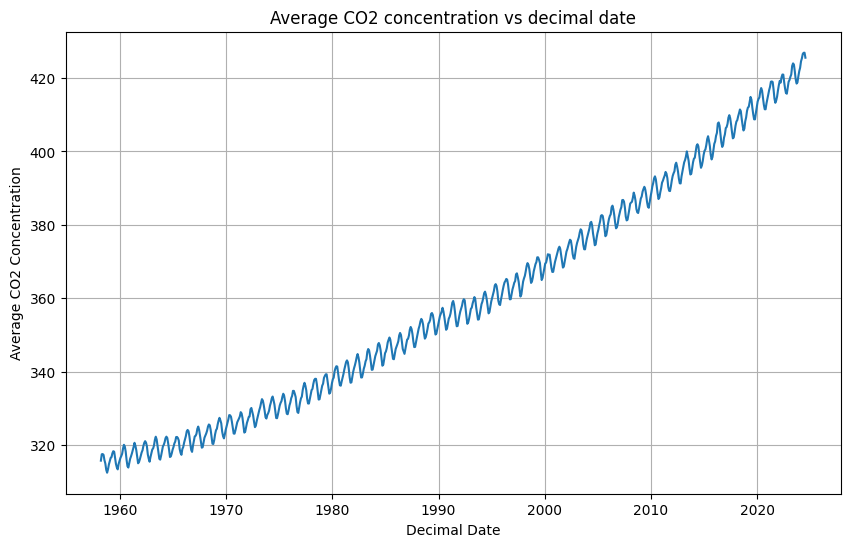

In [12]:
from pandasai import SmartDataframe
from pandasai.llm.local_llm import LocalLLM

ollama_llm = LocalLLM(api_base="http://localhost:11434/v1", model="llama3.1:8b")
df = SmartDataframe("data.csv", config={"llm": ollama_llm, "custom_whitelisted_dependencies": ["altair"]})

df.chat("Plot the average CO2 concentration vs decimal_date")

In [13]:
print(df.last_code_generated)

dfs.append(pd.DataFrame({'Unnamed: 0': [770, 187, 161], 'year': [2022, 1966, 1974], 'month': [8, 12, 1], 'decimal_date': [2013.2917, 1990.2083, 1983.125], 'average': [396.93, 322.57, 316.43], 'smooth': [369.24, 382.27, 382.52], 'std_days': [2, 19, 7], 'uncertainty_monthly_mean': [0.64, 0.98, 0.46], 'empty': [0.37, 0.45, 0.51]}))
average = dfs[0]['average']
decimal_date = dfs[0]['decimal_date']
plt.figure(figsize=(10, 6))
plt.plot(decimal_date, average)
plt.title('Average CO2 concentration vs decimal date')
plt.xlabel('Decimal Date')
plt.ylabel('Average CO2 Concentration')
plt.grid(True)
plt.savefig('/home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png')
result = {'type': 'plot', 'value': '/home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png'}
print(result)
